In [1]:
import numpy as np 
import pandas as pd 
import keras 
import tensorflow as tf 

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

import matplotlib.pyplot as plt 
from nltk.corpus import stopwords

In [2]:
path = './bbc-text.csv'

In [3]:
data = pd.read_csv(path)
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
articles = data.text.values
labels = data.category.values

In [5]:
stops = set(stopwords.words('english'))

for i, text in enumerate(articles):
    temp = text.split()
    temp = [w for w in temp if not w in stops]
    temp = " ".join(temp)
    articles[i] = temp

In [7]:
from sklearn.model_selection import train_test_split

train_articles, temp_articles, train_labels, temp_labels = train_test_split(articles, labels, train_size=0.7)
val_articles, test_articles, val_labels, test_labels = train_test_split(temp_articles, temp_labels, test_size=0.5)

In [8]:
num_words = 5000
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=num_words, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)

train_seq = tokenizer.texts_to_sequences(train_articles)
val_seq = tokenizer.texts_to_sequences(val_articles)
test_seq = tokenizer.texts_to_sequences(test_articles)

In [9]:
max_length = 256

train_padded = pad_sequences(train_seq, maxlen=max_length, padding='post', truncating='post')
val_padded = pad_sequences(val_seq, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_seq, maxlen=max_length, padding='post', truncating='post')

In [10]:
print(train_padded.shape)
print(val_padded.shape)
print(test_padded.shape)

(1557, 256)
(334, 256)
(334, 256)


In [11]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_labels)

train_labels_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
val_labels_seq = np.array(label_tokenizer.texts_to_sequences(val_labels))
test_labels_seq = np.array(label_tokenizer.texts_to_sequences(test_labels))

In [12]:
embedding_dim = 64

model = keras.models.Sequential([
    keras.layers.Embedding(num_words, embedding_dim),
    keras.layers.Bidirectional(keras.layers.LSTM(embedding_dim, seed=42)),
    keras.layers.Dense(embedding_dim, activation='relu'),
    keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [15]:
history = model.fit(train_padded, train_labels_seq, epochs=10, batch_size=8, validation_data=(val_padded,val_labels_seq))

Epoch 1/10


195/195 [==============================] - 5s 25ms/step - loss: 3.8154e-05 - accuracy: 1.0000 - val_loss: 0.3355 - val_accuracy: 0.9311
Epoch 2/10
195/195 [==============================] - 5s 25ms/step - loss: 3.2573e-05 - accuracy: 1.0000 - val_loss: 0.3403 - val_accuracy: 0.9311
Epoch 3/10
195/195 [==============================] - 5s 25ms/step - loss: 2.7986e-05 - accuracy: 1.0000 - val_loss: 0.3480 - val_accuracy: 0.9341
Epoch 4/10
195/195 [==============================] - 5s 24ms/step - loss: 2.4193e-05 - accuracy: 1.0000 - val_loss: 0.3524 - val_accuracy: 0.9341
Epoch 5/10
195/195 [==============================] - 5s 25ms/step - loss: 2.1030e-05 - accuracy: 1.0000 - val_loss: 0.3572 - val_accuracy: 0.9341
Epoch 6/10
195/195 [==============================] - 5s 25ms/step - loss: 1.8344e-05 - accuracy: 1.0000 - val_loss: 0.3635 - val_accuracy: 0.9401
Epoch 7/10
195/195 [==============================] - 5s 25ms/step - loss: 1.6084e-05 - accuracy: 1.0000 - val_loss: 0.3680 - val

In [16]:
loss, acc = model.evaluate(test_padded, test_labels_seq)
print(f"Testing Loss: {loss}")
print(f"Testing Accuracy: {acc}")

11/11 [==============================] - 0s 18ms/step - loss: 0.3817 - accuracy: 0.9401
Testing Loss: 0.38172417879104614
Testing Accuracy: 0.940119743347168


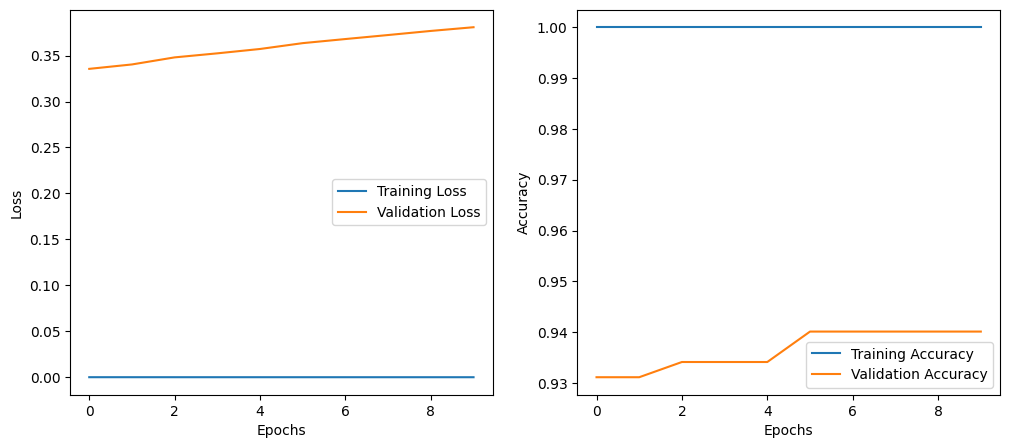

In [17]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
txt = ["blair prepares to name poll date tony blair is likely to name 5 may as election day when parliament returns from its easter break  the bbc s political editor has learned.  andrew marr says mr blair will ask the queen on 4 or 5 april to dissolve parliament at the end of that week. mr blair has so far resisted calls for him to name the day but all parties have stepped up campaigning recently. downing street would not be drawn on the claim  saying election timing was a matter for the prime minister.  a number 10 spokeswoman would only say:  he will announce an election when he wants to announce an election.  the move will signal a frantic week at westminster as the government is likely to try to get key legislation through parliament. the government needs its finance bill  covering the budget plans  to be passed before the commons closes for business at the end of the session on 7 april.  but it will also seek to push through its serious and organised crime bill and id cards bill. mr marr said on wednesday s today programme:  there s almost nobody at a senior level inside the government or in parliament itself who doesn t expect the election to be called on 4 or 5 april.  as soon as the commons is back after the short easter recess  tony blair whips up to the palace  asks the queen to dissolve parliament ... and we re going.  the labour government officially has until june 2006 to hold general election  but in recent years governments have favoured four-year terms."]

seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length, padding='post', truncating='post')

predict = model.predict(padded)
idx = np.argmax(predict)

article_labels = label_tokenizer.word_index
true_labels = list(article_labels.keys())

print(f"Category: {true_labels[idx-1]}")

1/1 [==============================] - 0s 22ms/step
Category: politics
